In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import chi2_contingency
from scipy.stats import zscore

# EDA

In [70]:
dados = pd.read_csv("C:\Projetos Pessoais\DataScience\segmentacao_Clientes_Ecomerce\data\dados_limpos_pre_EDA.csv")

In [71]:
dados

,Codigo,Descricao,Quantidade,Valor_unitario,Cod_cliente,Pais,Valor_total,Horario_venda,Data_venda
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30,08:26:00,2010-12-01
1,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.34,08:26:00,2010-12-01
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,22.00,08:26:00,2010-12-01
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,20.34,08:26:00,2010-12-01
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,20.34,08:26:00,2010-12-01
...,...,...,...,...,...,...,...,...,...
527787,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680,France,10.20,12:50:00,2011-12-09
527788,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680,France,12.60,12:50:00,2011-12-09
527789,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680,France,16.60,12:50:00,2011-12-09
527790,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680,France,16.60,12:50:00,2011-12-09


In [72]:
dados['Horario_venda'] = pd.to_datetime(dados['Horario_venda'])
dados['Data_venda'] = pd.to_datetime(dados['Data_venda'])
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527792 entries, 0 to 527791
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Codigo          527792 non-null  object        
 1   Descricao       527792 non-null  object        
 2   Quantidade      527792 non-null  int64         
 3   Valor_unitario  527792 non-null  float64       
 4   Cod_cliente     527792 non-null  int64         
 5   Pais            527792 non-null  object        
 6   Valor_total     527792 non-null  float64       
 7   Horario_venda   527792 non-null  datetime64[ns]
 8   Data_venda      527792 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(3)
memory usage: 36.2+ MB


C:\Users\alyss\AppData\Local\Temp\ipykernel_17916\3973933551.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dados['Horario_venda'] = pd.to_datetime(dados['Horario_venda'])


In [73]:
# Criação das variáveis mês e ano
dados['Mes'] = dados['Data_venda'].dt.month
dados['Ano'] = dados['Data_venda'].dt.year

In [74]:
dados

,Codigo,Descricao,Quantidade,Valor_unitario,Cod_cliente,Pais,Valor_total,Horario_venda,Data_venda,Mes,Ano
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30,2023-10-15 08:26:00,2010-12-01,12,2010
1,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.34,2023-10-15 08:26:00,2010-12-01,12,2010
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,22.00,2023-10-15 08:26:00,2010-12-01,12,2010
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,20.34,2023-10-15 08:26:00,2010-12-01,12,2010
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,20.34,2023-10-15 08:26:00,2010-12-01,12,2010
...,...,...,...,...,...,...,...,...,...,...,...
527787,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680,France,10.20,2023-10-15 12:50:00,2011-12-09,12,2011
527788,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680,France,12.60,2023-10-15 12:50:00,2011-12-09,12,2011
527789,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680,France,16.60,2023-10-15 12:50:00,2011-12-09,12,2011
527790,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680,France,16.60,2023-10-15 12:50:00,2011-12-09,12,2011


In [75]:
dados.describe(include='object').T

,count,unique,top,freq
Codigo,527792,3913,85123A,2265
Descricao,527792,4018,WHITE HANGING HEART T-LIGHT HOLDER,2323
Pais,527792,38,United Kingdom,484038


In [76]:
# Vendas gerais
vendas_Gerais = dados.groupby('Pais')['Valor_total'].sum().sort_values(ascending = False).reset_index()
vendas_Gerais.head()

,Pais,Valor_total
0,United Kingdom,8748247.473
1,Netherlands,283889.340
2,EIRE,271164.300
3,Germany,205569.890
4,France,184582.740


In [86]:
# Participação do Reino Unido do faturamento da empresa
vendas_Gerais['Valor_total'].sum()

# Participação UK é de 85% do faturamento da empresa

10272118.873

# Como a maior parte do faturamento da empresa advém do Reino Unido, farei toda a análise voltada para os clientes desta região

In [92]:
dados['Pais'].value_counts(normalize=True).head()

Pais
United Kingdom    0.917100
Germany           0.016404
France            0.015347
EIRE              0.014739
Spain             0.004589
Name: proportion, dtype: float64

### Venda de produtos por horário

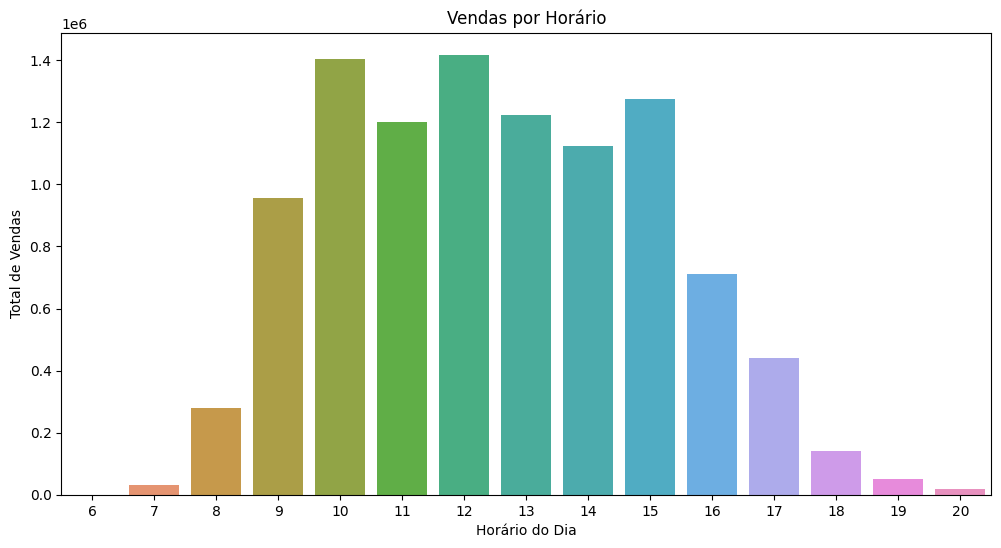

In [78]:
# Vendas de Produtos por horário

vendas_por_horario = dados.groupby(dados['Horario_venda'].dt.hour)['Valor_total'].sum().reset_index()

# Crie um gráfico de barras usando o Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=vendas_por_horario, x='Horario_venda', y='Valor_total')
plt.title('Vendas por Horário')
plt.xlabel('Horário do Dia')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=0)  # Para manter os rótulos dos horários na horizontal
plt.show()

### Venda de produtos por mês

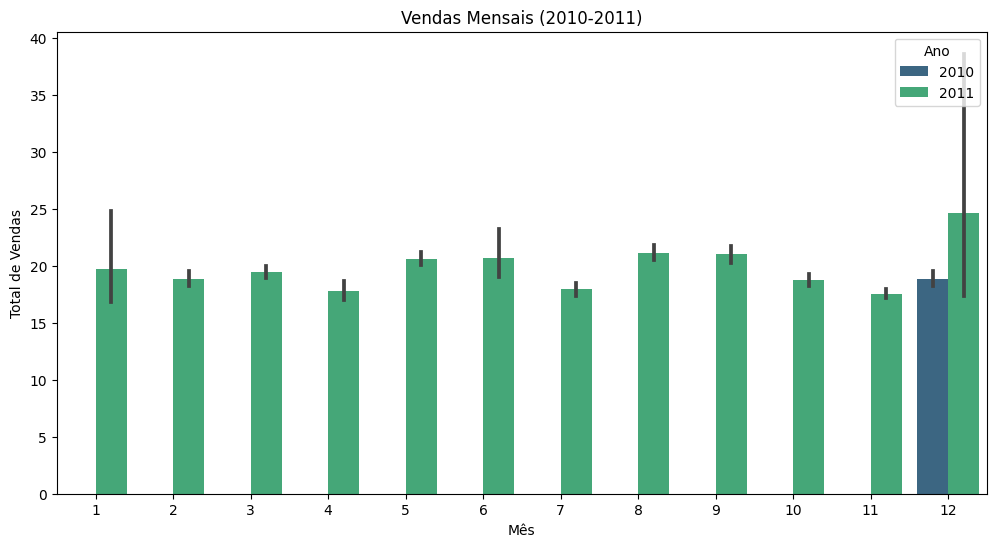

In [79]:
# Vendas de produtos por mês

dados_filtrados = dados[(dados['Ano'] == 2010) | ((dados['Ano'] == 2011) & (dados['Mes'] <= 12))]

# Crie um gráfico de barras usando o Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=dados_filtrados, x='Mes', y='Valor_total', hue='Ano', palette='viridis')
plt.title('Vendas Mensais (2010-2011)')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=0)  # Para manter os rótulos dos meses na horizontal
plt.legend(title='Ano')
plt.show()

## Quantidades de produtos com maiores saídas

### Aplicando metodologia RFM

- Criarei outro dataframe para realizar a junção dos dados relevantes de cada cliente e produtos, para utilizar posteriormente no pre processamento dos dados e segmentação

- Intuito também é diminuir dimensionalidade

In [94]:
dados.columns

Index(['Codigo', 'Descricao', 'Quantidade', 'Valor_unitario', 'Cod_cliente',
       'Pais', 'Valor_total', 'Horario_venda', 'Data_venda', 'Mes', 'Ano'],
      dtype='object')

In [110]:
dados_clientes = dados.groupby('Cod_cliente')['Data_venda'].max().reset_index()

# Data da# Find the most recent date in the entire dataset
most_recent_date = dados['Data_venda'].max()

# Convert InvoiceDay to datetime type before subtraction
dados_clientes['Data_venda'] = pd.to_datetime(dados_clientes['Data_venda'])
most_recent_date = pd.to_datetime(most_recent_date)

# Calculate the number of days since the last purchase for each customer
dados_clientes['Days_Since_Last_Purchase'] = (most_recent_date - dados_clientes['Data_venda']).dt.days

# Remove the InvoiceDay column
dados_clientes.drop(columns=['Data_venda'], inplace=True)

dados_clientes.head()

,Cod_cliente,Days_Since_Last_Purchase
0,12346,325
1,12347,2
2,12348,75
3,12349,18
4,12350,310
